In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#getting data
df = pd.read_csv('world_bank_first_project', index_col=False)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head()

,countryiso3code,country.value,GDP per capita (current US$),GDP (current US$),"Population, total",Population growth (annual %),"School enrollment, tertiary (% gross)","Life expectancy at birth, total (years)",High-technology exports (% of manufactured exports),Research and development expenditure (% of GDP),...,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Gini index (World Bank estimate),CO2 emissions (kg per PPP $ of GDP),Energy use (kg of oil equivalent per capita),Trade (% of GDP),"Foreign direct investment, net inflows (BoP, current US$)",year,region,country,incomeLevel
0,AFG,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,South Asia,Afghanistan,Low income
1,AFG,Afghanistan,502.115487,1.910135e+10,38041754.0,2.311817,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,45.621177,2.340455e+07,2019,South Asia,Afghanistan,Low income
2,AFG,Afghanistan,524.162881,1.948438e+10,37172386.0,2.384761,9.68642,64.486,NaN,NaN,...,NaN,NaN,NaN,NaN,49.235892,1.194351e+08,2018,South Asia,Afghanistan,Low income
3,AFG,Afghanistan,556.302002,2.019176e+10,36296400.0,2.548347,NaN,64.130,NaN,NaN,...,NaN,NaN,NaN,NaN,45.114195,5.153390e+07,2017,South Asia,Afghanistan,Low income
4,AFG,Afghanistan,547.228110,1.936264e+10,35383128.0,2.778317,NaN,63.763,NaN,NaN,...,NaN,NaN,0.115126,NaN,43.710410,9.359132e+07,2016,South Asia,Afghanistan,Low income


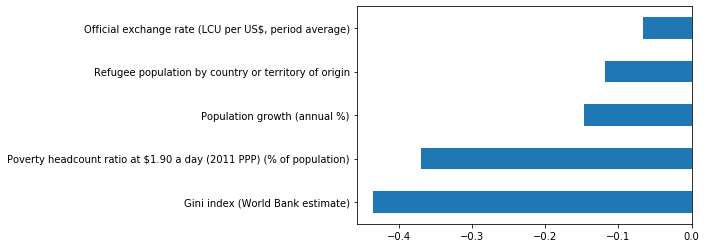

In [10]:
#the correlation between GDP per catipa and variable
df.corr()['GDP per capita (current US$)'].sort_values().head().plot.barh()

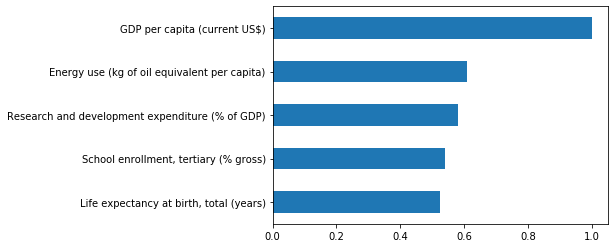

In [11]:
#the correlation between GDP per catipa and variable
df.corr()['GDP per capita (current US$)'].sort_values().tail().plot.barh()

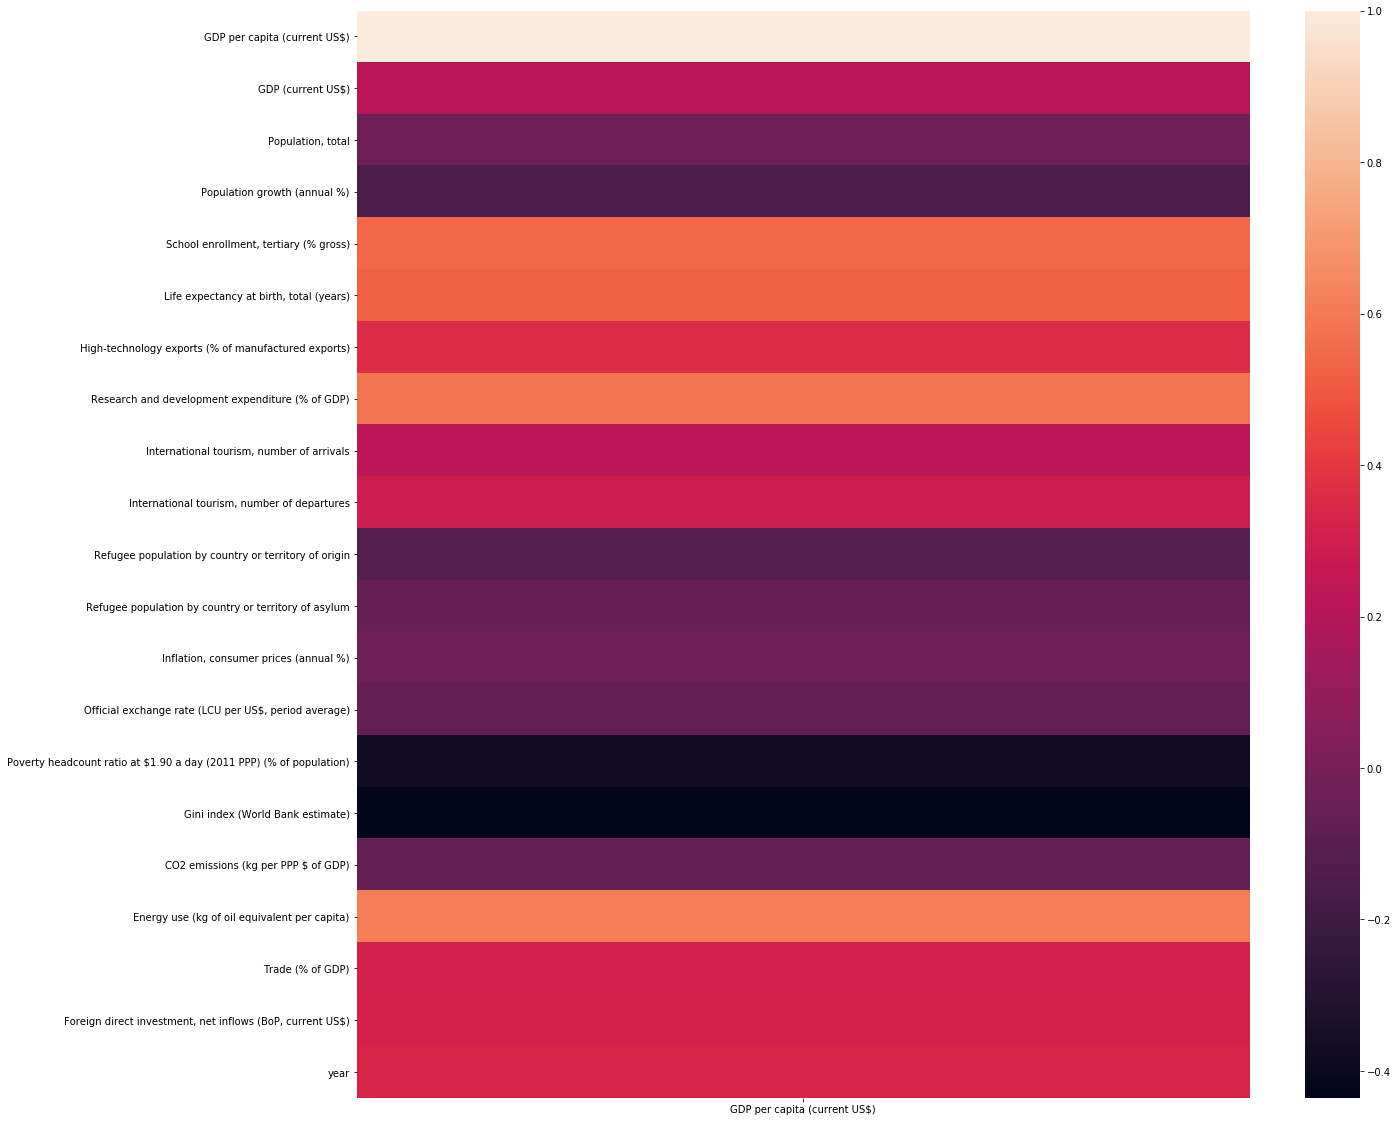

In [12]:
#the correlation between GDP per catipa and variable, showing with heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr()[['GDP per capita (current US$)']])

In [15]:
#ratio of null values
df.isnull().sum()/df.shape[0]

countryiso3code                                                        0.000000
country.value                                                          0.000000
GDP per capita (current US$)                                           0.255269
GDP (current US$)                                                      0.255043
Population, total                                                      0.024628
Population growth (annual %)                                           0.041097
School enrollment, tertiary (% gross)                                  0.578605
Life expectancy at birth, total (years)                                0.128881
High-technology exports (% of manufactured exports)                    0.875652
Research and development expenditure (% of GDP)                        0.851552
International tourism, number of arrivals                              0.662310
International tourism, number of departures                            0.833497
Refugee population by country or territo

In [16]:
#sum of null values
df.isnull().sum()

countryiso3code                                                            0
country.value                                                              0
GDP per capita (current US$)                                            3379
GDP (current US$)                                                       3376
Population, total                                                        326
Population growth (annual %)                                             544
School enrollment, tertiary (% gross)                                   7659
Life expectancy at birth, total (years)                                 1706
High-technology exports (% of manufactured exports)                    11591
Research and development expenditure (% of GDP)                        11272
International tourism, number of arrivals                               8767
International tourism, number of departures                            11033
Refugee population by country or territory of origin                    7155

In [135]:
#sub dataframe
tf=df[['GDP per capita (current US$)', 'Trade (% of GDP)','Population growth (annual %)',
       'Life expectancy at birth, total (years)','Official exchange rate (LCU per US$, period average)']]

In [136]:
#dropping null values
tf.dropna(inplace=True)

In [137]:
tf.shape

(7411, 5)

In [138]:
#checking null values
tf.isna().any()

GDP per capita (current US$)                            False
Trade (% of GDP)                                        False
Population growth (annual %)                            False
Life expectancy at birth, total (years)                 False
Official exchange rate (LCU per US$, period average)    False
dtype: bool

In [139]:
tf.head()

,GDP per capita (current US$),Trade (% of GDP),Population growth (annual %),"Life expectancy at birth, total (years)","Official exchange rate (LCU per US$, period average)"
2,524.162881,49.235892,2.384761,64.486,72.083247
3,556.302002,45.114195,2.548347,64.130,68.026904
4,547.228110,43.710410,2.778317,63.763,67.866086
5,578.466353,49.625408,3.077084,63.377,61.143462
6,613.856689,49.949037,3.355582,62.966,57.247500


In [71]:
tf = pd.get_dummies(tf, drop_first=True)

In [140]:
tf.sample(5)

,GDP per capita (current US$),Trade (% of GDP),Population growth (annual %),"Life expectancy at birth, total (years)","Official exchange rate (LCU per US$, period average)"
1145,4900.962201,94.144094,0.314659,71.635366,38.976500
11767,137.918629,34.916238,3.003304,57.133000,20.800000
2775,1187.551284,70.819354,2.734464,54.638000,272.264788
1948,78.514329,21.804511,1.945172,42.225000,50.000000
4939,253.227290,25.448131,2.936235,47.219000,1.000000


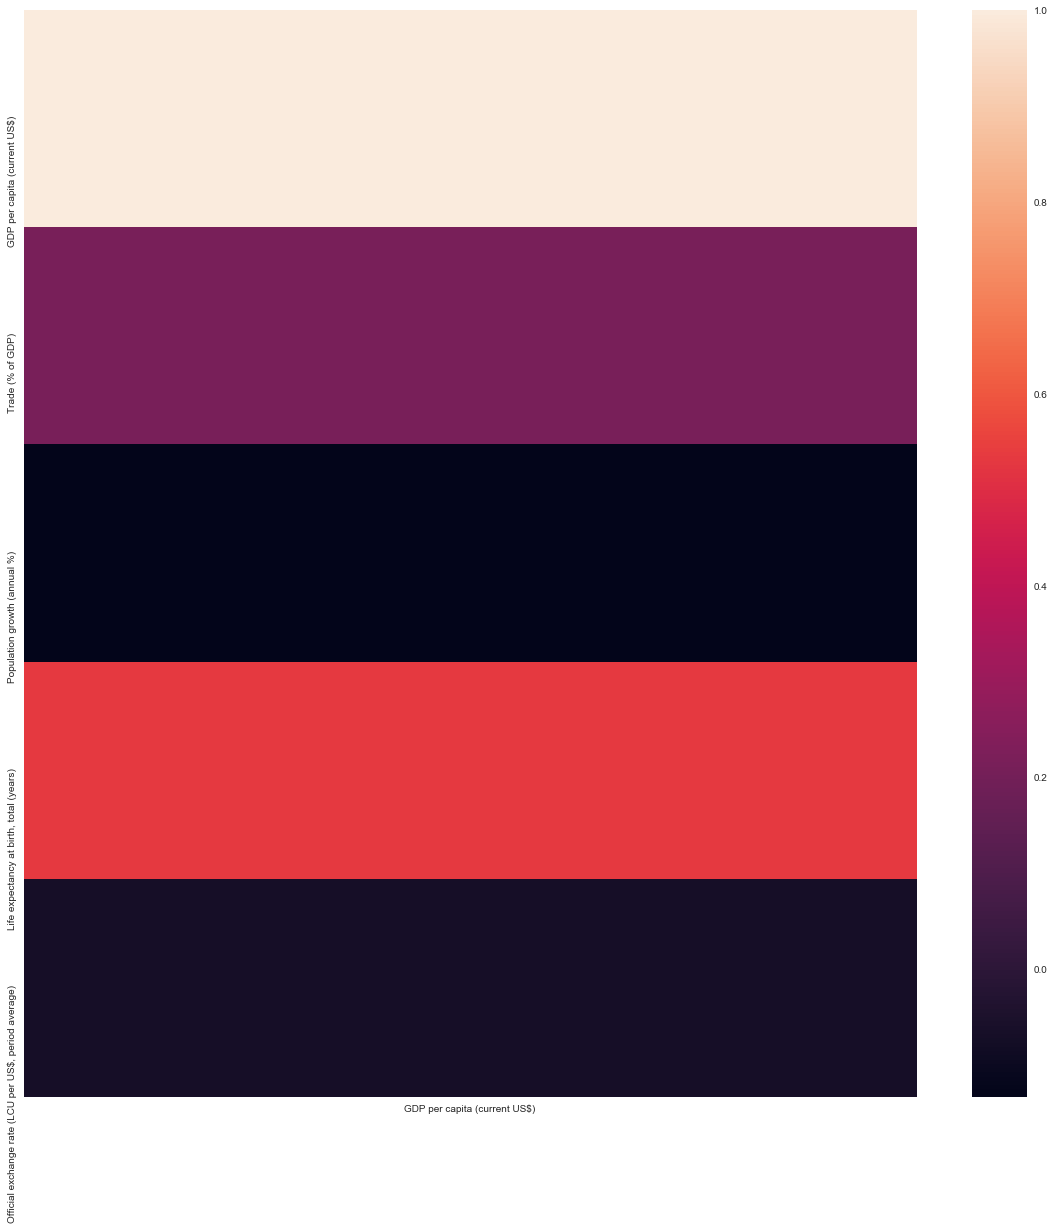

In [141]:
#the correlation between GDP per catipa and variable, showing with heatmap
plt.figure(figsize=(20,20))
sns.heatmap(tf.corr()[['GDP per capita (current US$)']])

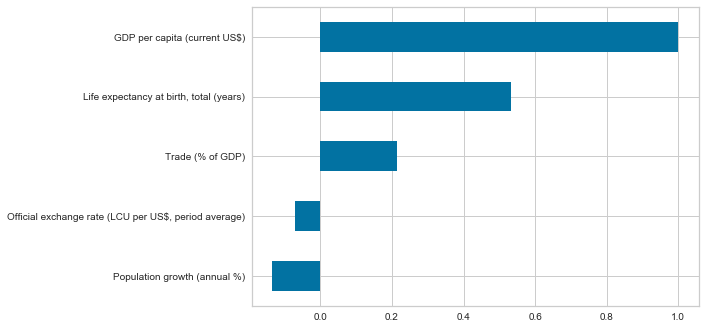

In [142]:
#the correlation between GDP per catipa and variable
tf.corr()['GDP per capita (current US$)'].sort_values().tail().plot.barh()

In [143]:
X=tf.drop(["GDP per capita (current US$)"], axis=1)
y= tf['GDP per capita (current US$)']

In [144]:
X.isnull().any()

Trade (% of GDP)                                        False
Population growth (annual %)                            False
Life expectancy at birth, total (years)                 False
Official exchange rate (LCU per US$, period average)    False
dtype: bool

In [145]:
y = np.log(y)

In [146]:
y

2        6.261802
3        6.321311
4        6.304866
5        6.360380
6        6.419761
           ...   
13217    6.583557
13218    6.442488
13219    6.477212
13220    6.498436
13221    6.543239
Name: GDP per capita (current US$), Length: 7411, dtype: float64

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [148]:
#linerat regression model for GDP per capita
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [149]:
from sklearn.metrics import classification_report,confusion_matrix

In [150]:
pred = lm.predict(X_test)



In [151]:
#evaluation function
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [152]:
eval_metrics(y_test, pred)

r2_score: 0.7163500060583347 
 mae: 0.6988902377101617 
 mse: 0.7748569156130272 
 rmse: 0.8802595728607711


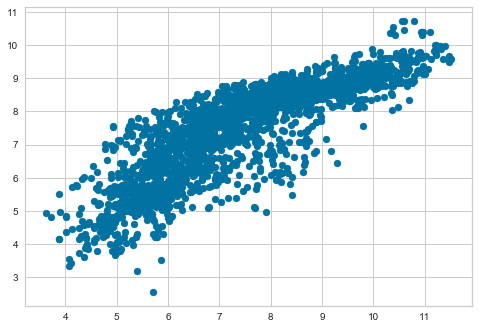

In [153]:
plt.scatter(y_test, pred)

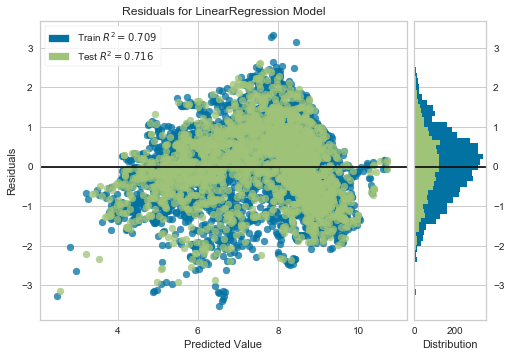

In [154]:
#visualzation of residual
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [155]:
#evaluation of the model
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train)
cv_scores.mean()

0.7081390641641332

In [156]:
#Ridge model
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [157]:
ridge_model=Ridge()

In [158]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [159]:
y_pred=ridge_model.predict(X_test)

In [160]:
eval_metrics(y_test, y_pred)

r2_score: 0.7163501063760505 
 mae: 0.6988899662986657 
 mse: 0.7748566415715059 
 rmse: 0.8802594172012622


In [161]:
alpha_space = np.linspace(0, 20, 50)

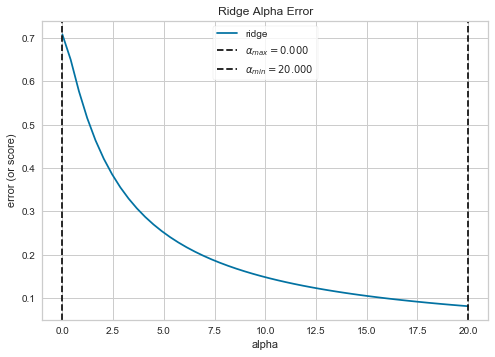

In [162]:
from yellowbrick.regressor import ManualAlphaSelection

# Create a list of alphas to cross-validate against
alpha_space = alpha_space 

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)

visualizer.fit(X_train, y_train)
visualizer.show()

In [163]:
ridge_model = Ridge(0.001).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.7163500061586667 
 mae: 0.6988902374387309 
 mse: 0.7748569153389466 
 rmse: 0.8802595727050895


In [164]:
ridge_model = Ridge(17, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.09549684082087262 
 mae: 1.3172172970297695 
 mse: 2.4708638923077664 
 rmse: 1.5718981812788533


In [165]:
#Lasso model
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [166]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.7152695623141676 
 mae: 0.6986081136155149 
 mse: 0.7778084027449848 
 rmse: 0.881934466241673


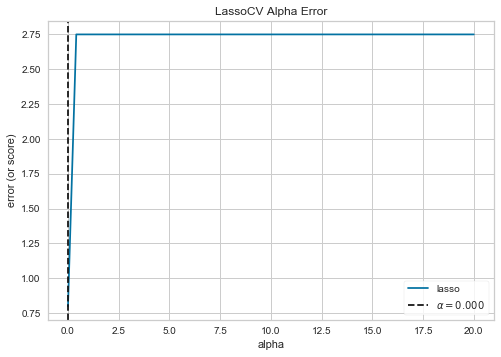

In [167]:
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = alpha_space

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space, normalize=True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [168]:
lasso_model = Lasso(0).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.7163500060583347 
 mae: 0.6988902377101621 
 mse: 0.7748569156130272 
 rmse: 0.8802595728607711


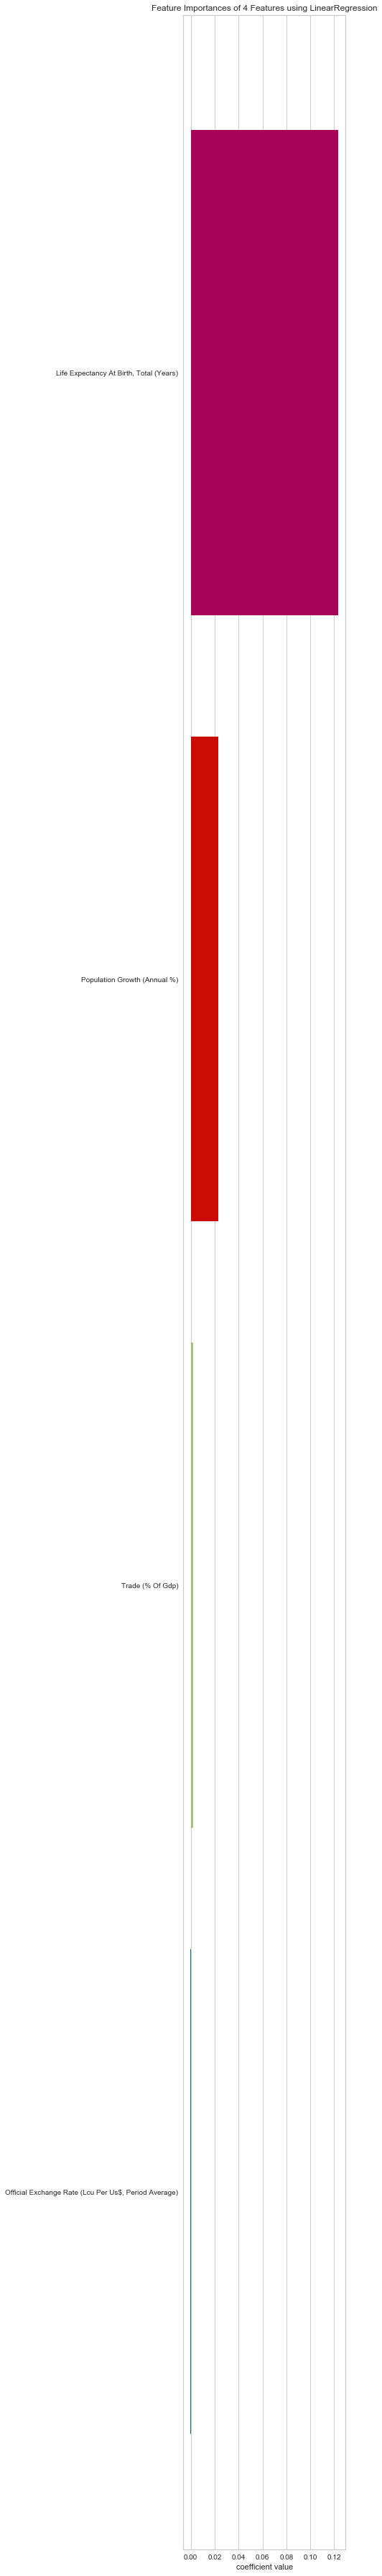

In [169]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lm, labels=labels, relative=False)
visualizer = RadViz(size=(500, 3600))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [174]:
#saving model
import pickle
pickle.dump(lm, open("saved_model1", 'wb'))

In [175]:
#calling model
first_model=pickle.load(open("saved_model1", "rb"))

In [176]:
X_train.columns

Index(['Trade (% of GDP)', 'Population growth (annual %)',
       'Life expectancy at birth, total (years)',
       'Official exchange rate (LCU per US$, period average)'],
      dtype='object')

In [284]:
#prediction
my_dict = {
    "Trade (% of GDP)":76.0, "Population growth (annual %)": 2.0,
    "Life expectancy at birth, total (years)": 72.0,
    "Official exchange rate (LCU per US$, period average)": 10.0
}

In [285]:
#prediction
gues = pd.DataFrame.from_dict([my_dict])

In [286]:
gues

,Trade (% of GDP),Population growth (annual %),"Life expectancy at birth, total (years)","Official exchange rate (LCU per US$, period average)"
0,76.0,2.0,72.0,10.0


In [194]:
#prediction
pre=X.sample(5)

In [195]:
pre

,Trade (% of GDP),Population growth (annual %),"Life expectancy at birth, total (years)","Official exchange rate (LCU per US$, period average)"
2332,95.913229,3.508147,48.907000,522.425625
2182,44.437510,1.222617,73.162683,1.000090
12844,39.001926,2.579005,69.923000,0.008083
4965,43.540174,2.635755,51.727000,1004.016583
6482,89.297642,1.782026,73.439000,0.294700


In [283]:
#prediction
np.exp(first_model.predict(pre))

array([ 285.34808739, 4976.29793835, 3400.24793603,  338.85033331,
       5783.34629129])

In [204]:
#prediction
np.exp(y[6482])

27011.727650275785

In [8]:
#making copy of df
adf = df.copy()

In [529]:
#cheking the ratio of null variables which are bigger than 0,4
adf.isnull().sum()/adf.shape[0] < 0.4

countryiso3code                                                         True
country.value                                                           True
GDP per capita (current US$)                                            True
GDP (current US$)                                                       True
Population, total                                                       True
Population growth (annual %)                                            True
School enrollment, tertiary (% gross)                                  False
Life expectancy at birth, total (years)                                 True
High-technology exports (% of manufactured exports)                    False
Research and development expenditure (% of GDP)                        False
International tourism, number of arrivals                              False
International tourism, number of departures                            False
Refugee population by country or territory of origin                   False

In [532]:
#having a list of variables which the null values ratio is smaller 0,4
col = list(adf.columns)
liste = []
for i in col:
    if adf[i].isnull().sum()/adf.shape[0] < 0.4:
        liste.append(i)


In [533]:
liste

['countryiso3code',
 'country.value',
 'GDP per capita (current US$)',
 'GDP (current US$)',
 'Population, total',
 'Population growth (annual %)',
 'Life expectancy at birth, total (years)',
 'Official exchange rate (LCU per US$, period average)',
 'Trade (% of GDP)',
 'Foreign direct investment, net inflows (BoP, current US$)',
 'year',
 'region',
 'country',
 'incomeLevel']

In [9]:
liste = ['GDP per capita (current US$)',
 'Population, total',
 'Life expectancy at birth, total (years)',
 'Official exchange rate (LCU per US$, period average)',
 'year',
'Trade (% of GDP)',
'Foreign direct investment, net inflows (BoP, current US$)',
 'region',
    'country']

In [10]:
#sub dataframe
adf = adf[liste]

In [7]:
#measuring years as age of countries
adf['age'] = adf.year.apply(lambda x: 2020 - x)

In [537]:
#dropping the year
adf.drop('year',axis=1, inplace=True)

In [538]:
adf = pd.get_dummies(adf)

In [539]:
adf.dropna(inplace=True)

In [266]:
#eliminating outliers
adf = adf[adf['GDP per capita (current US$)']<80000]

In [298]:
#eliminating outliers
adf = adf[adf['GDP per capita (current US$)']>5000]

In [540]:
adf.shape

(6539, 14)

In [544]:
#features of GDP per capita column
adf[['GDP per capita (current US$)']].describe()

,GDP per capita (current US$)
count,6539.000000
mean,6870.938409
std,12168.184311
min,57.589072
25%,650.073725
50%,2013.382462
75%,7178.694530
max,102913.450844


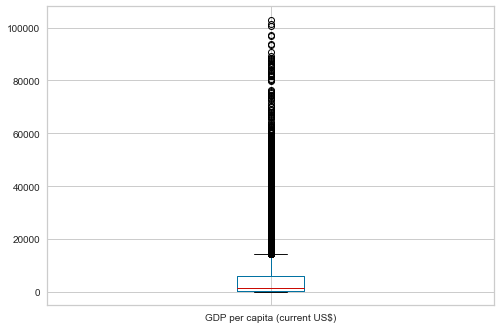

In [326]:
#features of GDP per capita column
adf[['GDP per capita (current US$)']].plot.box()

In [543]:
#the correlation of GDP per capita with variables
adf.corr()['GDP per capita (current US$)']

GDP per capita (current US$)                                 1.000000
Population, total                                           -0.024454
Life expectancy at birth, total (years)                      0.540333
Official exchange rate (LCU per US$, period average)        -0.081256
Trade (% of GDP)                                             0.187530
Foreign direct investment, net inflows (BoP, current US$)    0.330273
age                                                         -0.279446
region_East Asia & Pacific                                   0.087867
region_Europe & Central Asia                                 0.255941
region_Latin America & Caribbean                            -0.089327
region_Middle East & North Africa                            0.067416
region_North America                                         0.241432
region_South Asia                                           -0.106831
region_Sub-Saharan Africa                                   -0.283127
Name: GDP per capita

In [541]:
X=adf.drop(["GDP per capita (current US$)"], axis=1)
y= adf['GDP per capita (current US$)']

In [542]:
#linear regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
lm = LinearRegression()
lm.fit(X_train,y_train)
pred = lm.predict(X_test)
eval_metrics(y_test, pred)

r2_score: 0.3995445645213809 
 mae: 5844.06413628445 
 mse: 90923661.84020618 
 rmse: 9535.389967914589


In [709]:
X_train

,"Population, total","Life expectancy at birth, total (years)","Official exchange rate (LCU per US$, period average)",Trade (% of GDP),"Foreign direct investment, net inflows (BoP, current US$)",age,region_East Asia & Pacific,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa
4915,7884034.0,59.661000,1.000000e+00,24.932246,6.180000e+07,35,0,0,1,0,0,0,0
1620,138108912.0,64.782000,5.909682e-09,15.171165,3.450000e+08,34,0,0,1,0,0,0,0
13119,16363507.0,62.464000,1.030750e+01,73.958535,6.628139e+08,4,0,0,0,0,0,0,1
7237,8971345.0,49.260000,5.434608e+01,23.533366,-8.000000e+05,39,0,0,0,0,0,0,1
3879,675239.0,58.978000,1.475277e+00,148.252228,5.016005e+06,36,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,25690611.0,73.555000,3.787092e+00,203.854645,3.924787e+09,15,1,0,0,0,0,0,0
10205,10283699.0,58.675000,6.937132e+02,67.514111,8.269267e+07,18,0,0,0,0,0,0,1
10252,7058322.0,75.687805,1.112779e+02,102.040226,2.355215e+09,4,0,1,0,0,0,0,0
10629,2000474.0,77.612195,1.927055e+02,120.262615,9.708000e+08,15,0,1,0,0,0,0,0


In [345]:
from sklearn.ensemble import RandomForestRegressor

In [710]:
#random regression model
rfr = RandomForestRegressor()

In [711]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [712]:
pred = rfr.predict(X_test)

In [713]:
eval_metrics(y_test, pred)

r2_score: 0.9640963703690257 
 mae: 1071.6572608478143 
 mse: 5436689.030553292 
 rmse: 2331.670866686225


In [549]:
#saving model, calling model
pickle.dump(rfr, open("saved_model2", 'wb'))
second_model=pickle.load(open("saved_model2", "rb"))

In [550]:
#prediction
sample= X_train.sample(1)

In [551]:
sample

,"Population, total","Life expectancy at birth, total (years)","Official exchange rate (LCU per US$, period average)",Trade (% of GDP),"Foreign direct investment, net inflows (BoP, current US$)",age,region_East Asia & Pacific,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa
6186,27768296.0,53.486,51.429833,71.745742,4.228925e+07,25,0,0,0,0,0,0,1


In [552]:
df['country'][6186]

'Kenya'

In [553]:
df['year'][6186]

1995

In [554]:
second_model.predict(sample)

array([354.34683139])

In [555]:
df[(df['country']=='Kenya')&(df['year']==1995)]

,countryiso3code,country.value,GDP per capita (current US$),GDP (current US$),"Population, total",Population growth (annual %),"School enrollment, tertiary (% gross)","Life expectancy at birth, total (years)",High-technology exports (% of manufactured exports),Research and development expenditure (% of GDP),...,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Gini index (World Bank estimate),CO2 emissions (kg per PPP $ of GDP),Energy use (kg of oil equivalent per capita),Trade (% of GDP),"Foreign direct investment, net inflows (BoP, current US$)",year,region,country,incomeLevel
6186,KEN,Kenya,325.778941,9.046326e+09,27768296.0,2.989261,NaN,53.486,NaN,NaN,...,NaN,NaN,0.176566,437.930077,71.745742,4.228925e+07,1995,Sub-Saharan Africa,Kenya,Lower middle income


In [882]:
#sub dataframe for clustring
X_k = X[['Population, total',
 'Life expectancy at birth, total (years)',
 'Official exchange rate (LCU per US$, period average)',
        'Trade (% of GDP)',
        'Foreign direct investment, net inflows (BoP, current US$)', 'age']]

In [772]:
#sub dataframe for clustring as specific year
X_k = X_k[X_k.age == 4]

In [738]:
from pyclustertend import hopkins

In [741]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [773]:
hopkins(X_k, X_k.shape[0])

0.10978584454198706

In [791]:
#to choose cluster number
ssd = []

K = range(5,15)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X_k)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow Method')

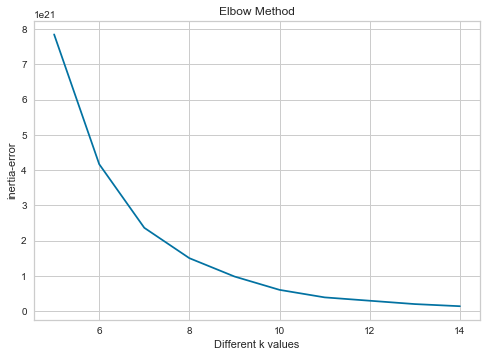

In [792]:
#to choose cluster number
plt.plot(K, ssd, "bx-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("Elbow Method")

In [789]:
from yellowbrick.cluster import KElbowVisualizer

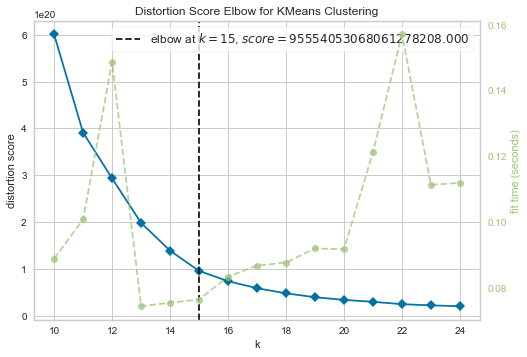

In [796]:
#to choose cluster number
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (10,25))
visu.fit(X_k)
visu.poof()

In [797]:
#Kmeans model with 15 clusters
model=KMeans(n_clusters = 15)
model.fit(X_k)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

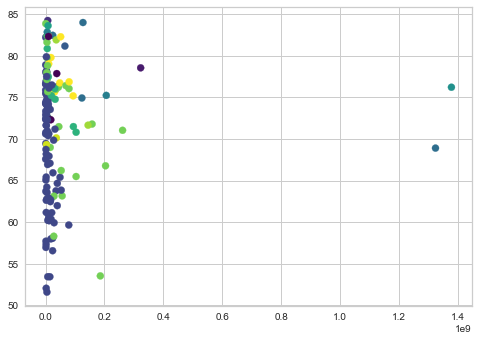

In [805]:
#visualization of clusters with two variables
plt.scatter(X_k.iloc[:,0], X_k.iloc[:,1], c = model.labels_, s = 50, cmap = "viridis");

In [798]:
#clusters
model.labels_

array([ 3,  3,  3,  3,  3, 11,  3,  3,  5, 11,  3,  3, 11,  3,  3,  3,  3,
        3,  3,  3,  3,  6,  3,  3,  3,  3,  3, 11,  3, 12,  3,  3, 14,  7,
       14,  3,  3,  3, 11,  3,  3, 14,  9,  3, 11,  3,  9,  3,  3,  3, 11,
        3,  3,  3, 11,  3,  3,  3,  3,  3,  3,  3,  2,  6,  3,  5, 11, 11,
       13, 14,  3,  5,  3,  0,  3,  3, 14,  3,  3,  3,  3, 11,  3,  3,  3,
       11,  3,  3, 14,  3,  3,  3,  3,  5,  3, 13,  3, 11, 11, 11,  3,  3,
       11,  3,  3, 11,  3, 10, 11, 11, 11,  3,  9,  9,  0,  3,  9, 12,  3,
        3,  9,  3, 11,  3,  3,  6, 11,  3,  3,  0,  8,  3,  3, 11,  3,  3,
        3,  3, 14,  3, 11,  9,  4,  1,  3,  3, 14,  3], dtype=int32)

In [799]:
#clusters
X_k["predicted_clusters"]=model.labels_

In [808]:
#14th clusters
df.loc[list(X_k[X_k['predicted_clusters'] == 14].index)]['country'].unique()

array(['Chile', 'Colombia', 'Czech Republic', 'Israel', 'Korea, Rep.',
       'Malaysia', 'Turkey', 'Vietnam'], dtype=object)

In [861]:
X_k.drop('predicted_clusters', axis=1, inplace=True)

In [809]:
from scipy.cluster.hierarchy import linkage

In [818]:
#choosing number of clusters with dendrogram
hc_complete =  linkage(X_k,"complete")
hc_ward = linkage(X_k, "ward")

In [812]:
from scipy.cluster.hierarchy import dendrogram

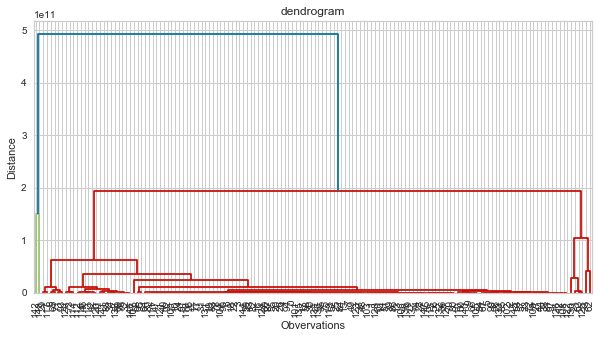

In [819]:
#choosing number of clusters with dendrogram
plt.figure(figsize = (10,5))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

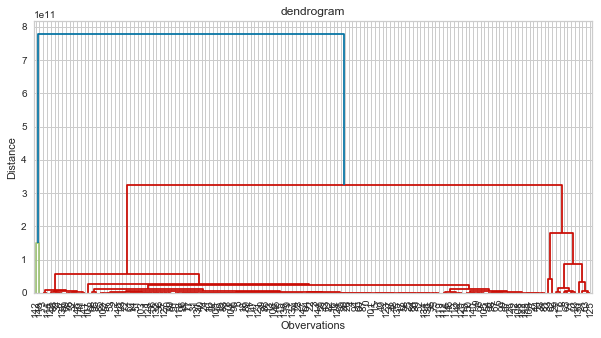

In [820]:
#choosing number of clusters with dendrogram
plt.figure(figsize = (10,5))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

In [821]:
from sklearn.cluster import AgglomerativeClustering

In [881]:
#predicting clusters
cluster = AgglomerativeClustering(n_clusters = 7,affinity='euclidean',linkage='ward')
cluster.fit_predict(X_k)

array([0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1, 0, 1, 1, 1,
       1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 4, 1, 0, 0, 2, 1, 0, 1, 2, 1, 2,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 5, 2, 1, 4,
       0, 3, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 5, 0, 1, 0, 1, 2, 0,
       0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 6, 6, 1, 1, 3, 0])

In [851]:
X_k["predicted_clusters"]=cluster.labels_


In [856]:
df.loc[list(X_k[X_k['predicted_clusters'] == 4].index)]['country'].unique()

array(['United States'], dtype=object)

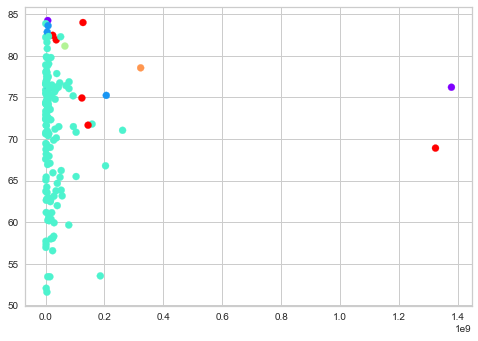

In [857]:
#visualization of clusters with two variables
plt.scatter(X_k.iloc[:,0],X_k.iloc[:,1],c=cluster.labels_,cmap="rainbow")

In [858]:
X_k.head(1)

,"Population, total","Life expectancy at birth, total (years)","Official exchange rate (LCU per US$, period average)",Trade (% of GDP),"Foreign direct investment, net inflows (BoP, current US$)",age,predicted_clusters
4,35383128.0,63.763,67.866086,43.71041,93591315.3,4,2


In [859]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [862]:
#silhouette_score for clustering
print(f'Silhouette Score(n=3): {silhouette_score(X_k, cluster.labels_)}')

Silhouette Score(n=3): 0.8548709395538981


In [864]:
from sklearn.preprocessing import scale

In [865]:
#hopkins value for clustering
hopkins(scale(X_k),X_k.shape[0])

0.08236140811940354

In [883]:
#sclaing the dataframe
X_k = scale(X_k)

In [884]:
hc_complete =  linkage(X_k,"complete")
hc_ward = linkage(X_k, "ward")

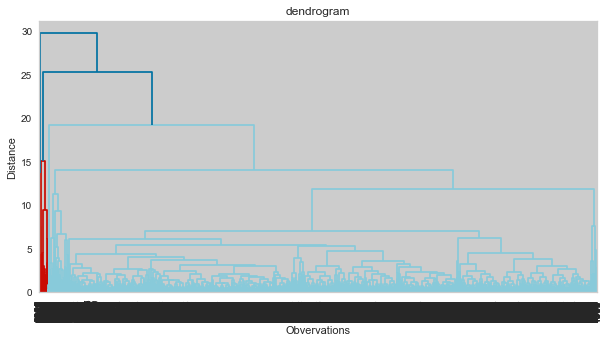

In [885]:
#choosing number of clusters with scaled dataframe by helping dendrogram
plt.figure(figsize = (10,5))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10);

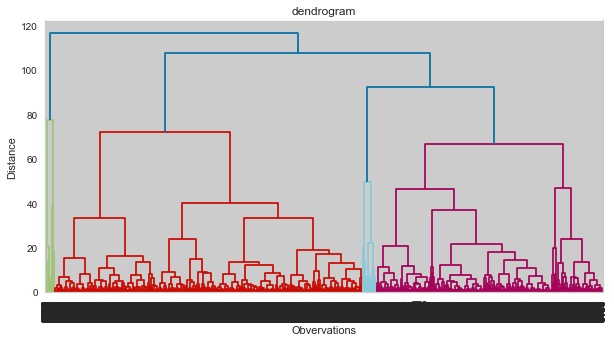

In [891]:
#choosing number of clusters with scaled dataframe by helping dendrogram
plt.figure(figsize = (10,5))
plt.title("dendrogram")
plt.xlabel("Obvervations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

In [888]:
#predicting clusters
cluster = AgglomerativeClustering(n_clusters = 8,affinity='euclidean',linkage='complete')
cluster.fit_predict(X_k)

array([7, 7, 7, ..., 7, 7, 7])

In [886]:
X_k = pd.DataFrame(X_k)

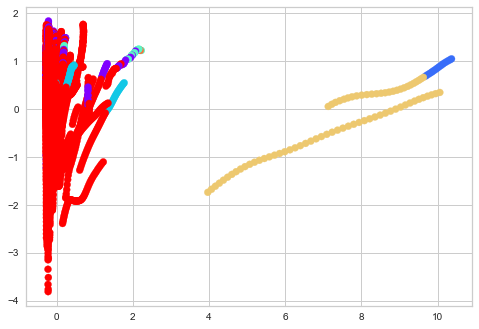

In [889]:
#visualization of clusters with two variables
plt.scatter(X_k.iloc[:,0],X_k.iloc[:,1],c=cluster.labels_,cmap="rainbow")

In [890]:
print(f'Silhouette Score(n=3): {silhouette_score(X_k, cluster.labels_)}')

Silhouette Score(n=3): 0.5144778042477903


In [892]:
from sklearn.decomposition import PCA

In [893]:
#reducing the number of values
pca = PCA(n_components = 2)
pca_fit = pca.fit_transform(X_k)

In [894]:
component_df = pd.DataFrame(data = pca_fit, columns=["first_component","second_component"])
component_df

,first_component,second_component
0,0.504379,0.025876
1,0.411307,0.077559
2,0.339605,0.103363
3,0.319854,0.054056
4,0.254587,0.058408
...,...,...
6534,-1.453279,0.359906
6535,-1.535416,0.400223
6536,-1.600332,0.418362
6537,-1.658716,0.432893


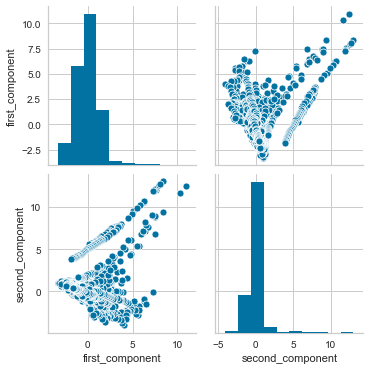

In [895]:
sns.pairplot(component_df)

In [907]:
pca.explained_variance_ratio_

array([0.27609368, 0.23030464, 0.17319303, 0.1218792 , 0.1019898 ,
       0.09653965])

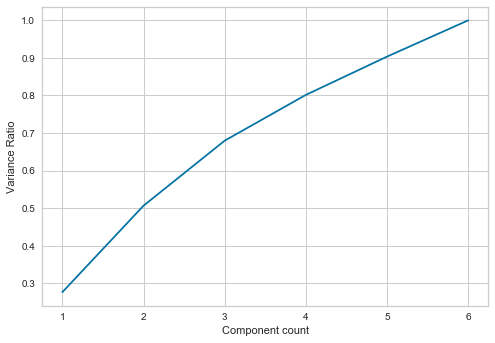

In [913]:
#visualization of explained_variance_ratio with number of values after PCA
pca = PCA().fit(X_k)
x = range(1,7)
plt.plot(x,np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio");

In [914]:
#PCA with 4 components
pca = PCA(n_components = 4)
pca_fit = pca.fit_transform(X_k)

In [915]:
component_df = pd.DataFrame(data = pca_fit, columns=["first_component","second_component", 'thrid_component','forth_companent'])
component_df

,first_component,second_component,thrid_component,forth_companent
0,0.504379,0.025876,0.374710,-1.369815
1,0.411307,0.077559,0.378794,-1.378851
2,0.339605,0.103363,0.373101,-1.348988
3,0.319854,0.054056,0.334048,-1.221501
4,0.254587,0.058408,0.321514,-1.170832
...,...,...,...,...
6534,-1.453279,0.359906,-0.222700,0.247773
6535,-1.535416,0.400223,-0.222635,0.264691
6536,-1.600332,0.418362,-0.231623,0.308190
6537,-1.658716,0.432893,-0.243348,0.355597


In [920]:
#predicting clusters
cluster = AgglomerativeClustering(n_clusters = 15,affinity='euclidean',linkage='complete')
cluster.fit_predict(component_df)

array([ 4,  4,  4, ..., 12, 12, 12])

In [918]:
component_df = pd.DataFrame(component_df)

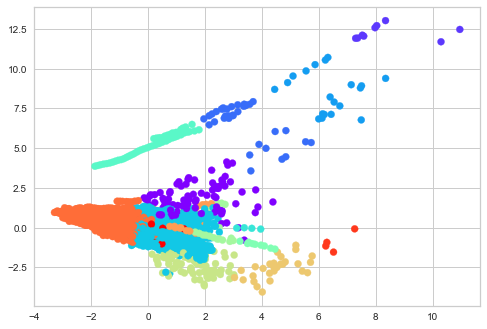

In [921]:
#visualization of clusters with two variables after pca
plt.scatter(component_df.iloc[:,0],component_df.iloc[:,1],c=cluster.labels_,cmap="rainbow")

In [922]:
print(f'Silhouette Score(n=3): {silhouette_score(component_df, cluster.labels_)}')

Silhouette Score(n=3): 0.3285202561277288


In [923]:
component_df['predict'] = cluster.labels_

In [967]:
df.loc[list(component_df[component_df['predict']==14].index)]['country'].unique()

array(['Belarus', 'Burkina Faso', 'Chile', "Cote d'Ivoire",
       'Dominican Republic', 'Grenada', 'Hong Kong SAR, China',
       'Kazakhstan', 'Korea, Rep.', 'Kuwait'], dtype=object)

In [557]:
#sub dataframe
df[df['countryiso3code']=='KOR']

,countryiso3code,country.value,GDP per capita (current US$),GDP (current US$),"Population, total",Population growth (annual %),"School enrollment, tertiary (% gross)","Life expectancy at birth, total (years)",High-technology exports (% of manufactured exports),Research and development expenditure (% of GDP),...,Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),Gini index (World Bank estimate),CO2 emissions (kg per PPP $ of GDP),Energy use (kg of oil equivalent per capita),Trade (% of GDP),"Foreign direct investment, net inflows (BoP, current US$)",year,region,country,incomeLevel
6344,KOR,"Korea, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,East Asia & Pacific,"Korea, Rep.",High income
6345,KOR,"Korea, Rep.",31761.977692,1.642383e+12,51709098.0,0.198353,NaN,NaN,32.365027,NaN,...,NaN,NaN,NaN,NaN,76.709395,1.056560e+10,2019,East Asia & Pacific,"Korea, Rep.",High income
6346,KOR,"Korea, Rep.",33340.265152,1.720579e+12,51606633.0,0.475334,95.864151,82.626829,36.346865,4.81009,...,NaN,NaN,NaN,NaN,78.660262,1.218260e+10,2018,East Asia & Pacific,"Korea, Rep.",High income
6347,KOR,"Korea, Rep.",31616.843400,1.623901e+12,51361911.0,0.280968,94.349693,82.626829,32.516974,4.55324,...,NaN,NaN,NaN,NaN,77.120918,1.791290e+10,2017,East Asia & Pacific,"Korea, Rep.",High income
6348,KOR,"Korea, Rep.",29288.870439,1.500112e+12,51217803.0,0.396852,94.033623,82.275610,30.524590,4.22744,...,NaN,NaN,0.30609,NaN,73.603809,1.210430e+10,2016,East Asia & Pacific,"Korea, Rep.",High income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6400,KOR,"Korea, Rep.",123.603495,3.458939e+09,27984155.0,2.615395,NaN,57.440927,NaN,NaN,...,NaN,NaN,NaN,NaN,17.342635,NaN,1964,East Asia & Pacific,"Korea, Rep.",High income
6401,KOR,"Korea, Rep.",146.314342,3.988785e+09,27261747.0,2.784820,NaN,56.970610,NaN,NaN,...,NaN,NaN,NaN,NaN,18.600301,NaN,1963,East Asia & Pacific,"Korea, Rep.",High income
6402,KOR,"Korea, Rep.",106.148506,2.814319e+09,26513030.0,2.859321,NaN,56.512317,NaN,NaN,...,NaN,NaN,NaN,NaN,19.469196,NaN,1962,East Asia & Pacific,"Korea, Rep.",High income
6403,KOR,"Korea, Rep.",93.828649,2.417558e+09,25765673.0,2.967244,NaN,56.014976,NaN,NaN,...,NaN,NaN,NaN,NaN,18.001923,NaN,1961,East Asia & Pacific,"Korea, Rep.",High income


In [379]:
df['GDP per capita (current US$)'][9619]

2457.31312098827

In [436]:
df_col = pd.get_dummies(df)

In [576]:
#sub dataframe
tr = df[df['country']=='Turkey']
kr = df[df['country']=='Korea, Rep.']

In [577]:
tr=pd.get_dummies(tr)
kr=pd.get_dummies(kr)

In [439]:
liste = list(X.columns)

In [440]:
tr.columns

Index(['GDP per capita (current US$)', 'GDP (current US$)',
       'Population, total', 'Population growth (annual %)',
       'School enrollment, tertiary (% gross)',
       'Life expectancy at birth, total (years)',
       'High-technology exports (% of manufactured exports)',
       'Research and development expenditure (% of GDP)',
       'International tourism, number of arrivals',
       'International tourism, number of departures',
       'Refugee population by country or territory of origin',
       'Refugee population by country or territory of asylum',
       'Inflation, consumer prices (annual %)',
       'Official exchange rate (LCU per US$, period average)',
       'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
       'Gini index (World Bank estimate)',
       'CO2 emissions (kg per PPP $ of GDP)',
       'Energy use (kg of oil equivalent per capita)', 'Trade (% of GDP)',
       'Foreign direct investment, net inflows (BoP, current US$)', 'year',
 

In [578]:
#chaging year as age
tr['age'] = 2020 - tr.year 
kr['age'] = 2020 - kr.year 

In [722]:
liste= ['Population, total',
 'Life expectancy at birth, total (years)',
 'Official exchange rate (LCU per US$, period average)',
        'Trade (% of GDP)',
        'Foreign direct investment, net inflows (BoP, current US$)',
    'age',
 'region_Europe & Central Asia']

In [580]:
tr = tr[liste]

In [725]:
#preparing data for prediction
for i in  ['region_East Asia & Pacific',
 
 'region_Latin America & Caribbean ',
 'region_Middle East & North Africa',
 'region_North America',
 'region_South Asia',
 'region_Sub-Saharan Africa ']:
    tr[i] = 0

In [582]:
liste= ['Population, total',
 'Life expectancy at birth, total (years)',
 'Official exchange rate (LCU per US$, period average)',
        'Trade (% of GDP)',
        'Foreign direct investment, net inflows (BoP, current US$)',
    'age',
 'region_East Asia & Pacific']

In [583]:
kr = kr[liste]

In [584]:
#preparing data for prediction
for i in  [ 'region_Europe & Central Asia',
 
 'region_Latin America & Caribbean ',
 'region_Middle East & North Africa',
 'region_North America',
 'region_South Asia',
 'region_Sub-Saharan Africa ']:
    kr[i] = 0

In [468]:
X.head(1)

,"Population, total","Life expectancy at birth, total (years)","Official exchange rate (LCU per US$, period average)",age,region_East Asia & Pacific,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa
2,37172386.0,64.486,72.083247,2,0,0,0,0,0,1,0


In [732]:
tr

,"Population, total","Life expectancy at birth, total (years)","Official exchange rate (LCU per US$, period average)",Trade (% of GDP),"Foreign direct investment, net inflows (BoP, current US$)",age,region_Europe & Central Asia,region_East Asia & Pacific,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa
12080,82319724.0,77.437,4.828370,60.157372,1.302300e+10,2,1,0,0,0,0,0,0
12081,81101892.0,77.161,3.648133,54.058310,1.109900e+10,3,1,0,0,0,0,0,0
12082,79821724.0,76.860,3.020135,46.815647,1.392900e+10,4,1,0,0,0,0,0,0
12083,78529409.0,76.532,2.720009,49.299866,1.926300e+10,5,1,0,0,0,0,0,0
12084,77231907.0,76.172,2.188542,51.414104,1.333700e+10,6,1,0,0,0,0,0,0
12085,75928564.0,75.784,1.903768,50.350325,1.356300e+10,7,1,0,0,0,0,0,0
12086,74653016.0,75.373,1.796001,52.245310,1.374400e+10,8,1,0,0,0,0,0,0
12087,73443863.0,74.944,1.674955,52.662941,1.618200e+10,9,1,0,0,0,0,0,0
12088,72326988.0,74.507,1.502849,45.899217,9.099000e+09,10,1,0,0,0,0,0,0
12089,71321399.0,74.074,1.549960,45.932474,8.585000e+09,11,1,0,0,0,0,0,0


In [601]:
kr

,"Population, total","Life expectancy at birth, total (years)","Official exchange rate (LCU per US$, period average)",Trade (% of GDP),"Foreign direct investment, net inflows (BoP, current US$)",age,region_East Asia & Pacific,region_Europe & Central Asia,region_Latin America & Caribbean,region_Middle East & North Africa,region_North America,region_South Asia,region_Sub-Saharan Africa
6346,51606633.0,82.626829,1100.500000,78.660262,1.218260e+10,2,1,0,0,0,0,0,0
6347,51361911.0,82.626829,1130.424621,77.120918,1.791290e+10,3,1,0,0,0,0,0,0
6348,51217803.0,82.275610,1160.433435,73.603809,1.210430e+10,4,1,0,0,0,0,0,0
6349,51014947.0,82.024390,1131.157500,79.132494,4.104100e+09,5,1,0,0,0,0,0,0
6350,50746659.0,81.721951,1052.960833,90.614442,9.273600e+09,6,1,0,0,0,0,0,0
6351,50428893.0,81.270732,1094.852917,97.952105,1.276660e+10,7,1,0,0,0,0,0,0
6352,50199853.0,80.819512,1126.470826,105.458328,9.495900e+09,8,1,0,0,0,0,0,0
6353,49936638.0,80.568293,1108.292125,105.566314,9.773000e+09,9,1,0,0,0,0,0,0
6354,49554112.0,80.117073,1156.060988,91.399596,9.497400e+09,10,1,0,0,0,0,0,0
6355,49307835.0,79.968293,1276.930000,86.133619,9.021900e+09,11,1,0,0,0,0,0,0


In [586]:
kr.drop([6344, 6345], inplace=True)

In [603]:
kr.dropna(inplace=True)

In [604]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 12080 to 12128
Data columns (total 13 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Population, total                                          49 non-null     float64
 1   Life expectancy at birth, total (years)                    49 non-null     float64
 2   Official exchange rate (LCU per US$, period average)       49 non-null     float64
 3   Trade (% of GDP)                                           49 non-null     float64
 4   Foreign direct investment, net inflows (BoP, current US$)  49 non-null     float64
 5   age                                                        49 non-null     int64  
 6   region_Europe & Central Asia                               49 non-null     uint8  
 7   region_East Asia & Pacific                                 49 non-null     int64  
 8   regio

In [605]:
kr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 6346 to 6394
Data columns (total 13 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Population, total                                          49 non-null     float64
 1   Life expectancy at birth, total (years)                    49 non-null     float64
 2   Official exchange rate (LCU per US$, period average)       49 non-null     float64
 3   Trade (% of GDP)                                           49 non-null     float64
 4   Foreign direct investment, net inflows (BoP, current US$)  49 non-null     float64
 5   age                                                        49 non-null     int64  
 6   region_East Asia & Pacific                                 49 non-null     uint8  
 7   region_Europe & Central Asia                               49 non-null     int64  
 8   region_

In [616]:
#prediction of GDP per catipa for Korea
second_model.predict(kr)

array([32791.05011225, 32201.16717692, 31217.0530368 , 30005.76436878,
       29285.31036617, 27531.68417059, 25547.03723857, 24845.96958026,
       22352.39976703, 21047.25338896, 21812.2748468 , 20643.22518151,
       20745.75381688, 18416.32785089, 16162.78370855, 13951.32894447,
       10614.85456417, 10662.16181735, 11115.35548766, 10427.75542943,
        7716.68638697, 10944.20998519, 12103.43607319, 10798.54747451,
        8006.50151014,  5174.94902151,  4244.01056792,  6323.15675941,
        2422.91111987,  3185.60782222,  3734.82917647,  2349.30635426,
        2508.90786308,  2086.4409173 ,  1654.73906508,  1854.49966165,
        1239.54263215,  1238.4422431 ,  1425.90662137,  1021.45563088,
         928.84850647,   929.1399439 ,   807.91905824,   691.09881634,
         604.75429736,   426.14614649,   380.58042056,   313.67514346,
         309.82565781])

In [506]:
#prediction of GDP per catipa for Turkey
b = second_model.predict(tr)

In [484]:
#actual data of GDP per catipa for Turkey
a = df[df['country']=='Turkey'].loc[12080:12138]['GDP per capita (current US$)']

In [491]:
a = pd.DataFrame(a)

In [493]:
a.reset_index(inplace=True)

In [497]:
a.drop('index', axis=1, inplace=True)

In [508]:
b = pd.DataFrame(b, columns=['predict'])

In [509]:
#merging actual and predicted values
c = a.join(b)

In [513]:
c.reset_index(inplace=True)

In [516]:
#calling back the year
c['year'] = 2018 - c['index']

In [520]:
c.drop('index', inplace=True, axis=1)

In [522]:
c.set_index('year', inplace=True)

In [637]:
c

,GDP per capita (current US$),predict
year,,
2018,9370.176355,14547.259493
2017,10513.648432,14145.457414
2016,10820.633842,11047.786480
2015,10948.724607,12120.526672
2014,12095.854572,11814.009843
2013,12519.391426,10587.418213
2012,11707.259712,10495.307364
2011,11335.510510,10537.702988
2010,10672.389246,10323.918572


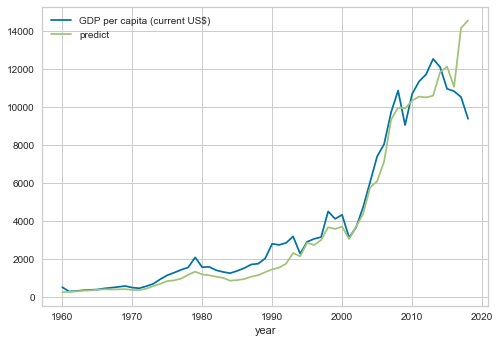

In [523]:
#differences between predicted and actual values for Turkey
c.plot()

In [617]:
#predcited values for Korea
k = second_model.predict(kr)
k = pd.DataFrame(k, columns=['korea'])

In [618]:
#predcited values for Turkey
t = second_model.predict(tr)
t = pd.DataFrame(t, columns=['turkey'])

In [621]:
k.reset_index(inplace=True)

In [623]:
k['year'] = 2018 - k['index']

In [624]:
k.set_index('year', inplace=True)

In [626]:
k.drop('index', axis=1, inplace=True)

In [632]:
#actual values for Korea
k_real = df[(df['countryiso3code']=='KOR')&(df['year']>1969)&(df['year']<2019)][['GDP per capita (current US$)','year']]

In [645]:
k.drop(columns='current', inplace=True)

In [655]:
#merging actual and predicted values
kk = k.join(k_real, rsuffix='r')

kk=kk[['year', 'korea', 'GDP per capita (current US$)']]

In [657]:
kk.set_index('year', inplace=True)

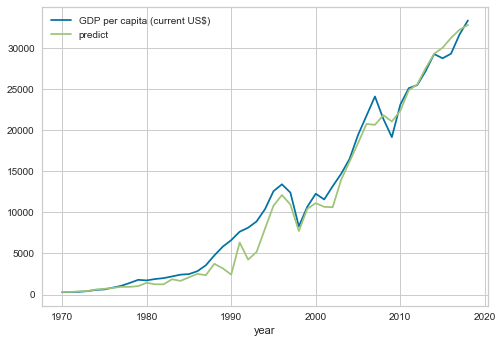

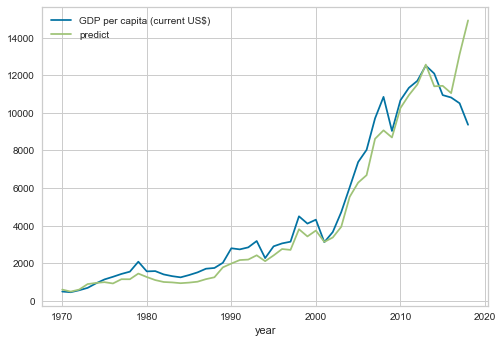

In [706]:
#differences between predicted and actual values for Turkey and Korea
kk.plot()
a.plot()

In [714]:
#values for Turkey
a

,GDP per capita (current US$),predict
year,,
2018,9370.176355,14925.208888
2017,10513.648432,13120.812539
2016,10820.633842,11053.830109
2015,10948.724607,11442.304332
2014,12095.854572,11417.348268
2013,12519.391426,12573.074152
2012,11707.259712,11514.187601
2011,11335.510510,10945.463126
2010,10672.389246,10257.593754


In [715]:
#values for Turkey
kk

,GDP per capita (current US$),predict
year,,
2018,33340.265152,32791.050112
2017,31616.843400,32201.167177
2016,29288.870439,31217.053037
2015,28732.231076,30005.764369
2014,29249.575221,29285.310366
2013,27182.734310,27531.684171
2012,25466.760517,25547.037239
2011,25096.263884,24845.969580
2010,23087.225644,22352.399767


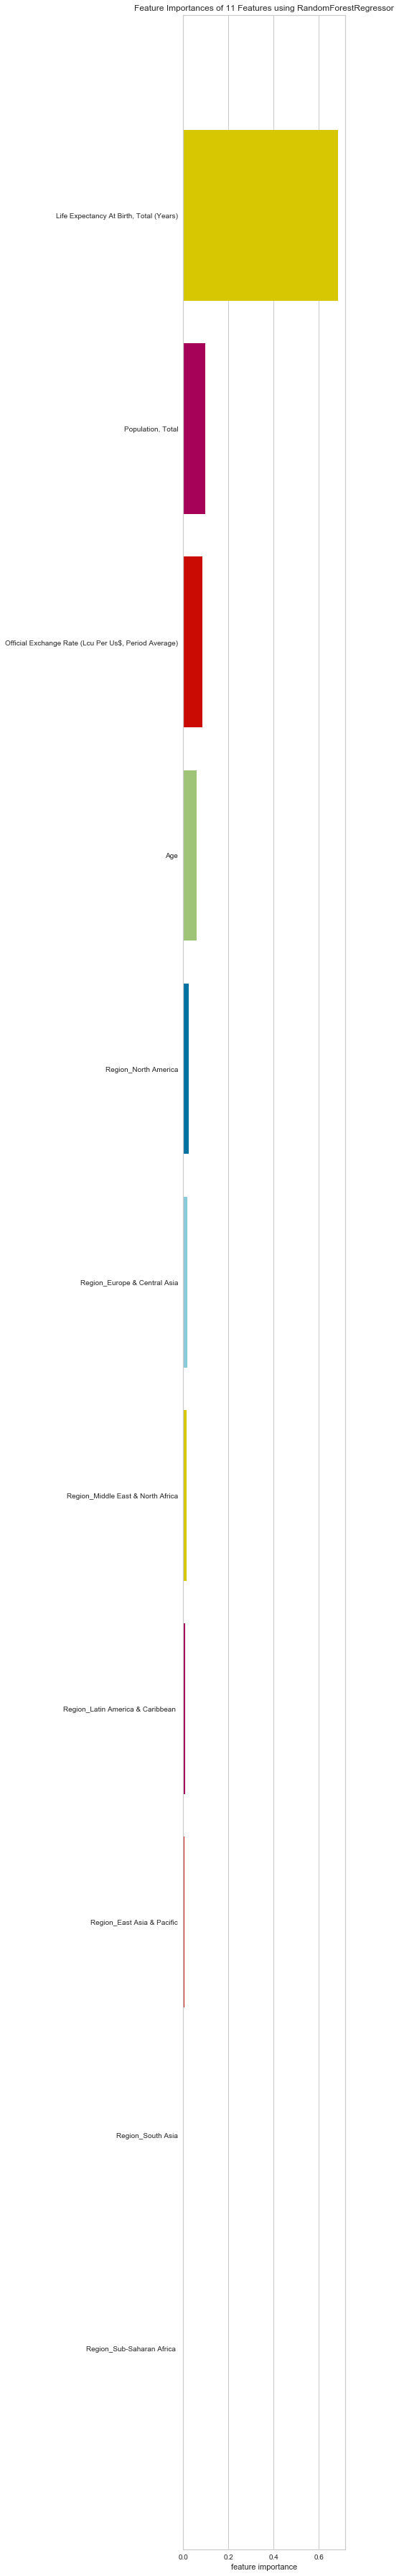

In [367]:
#feature importances for Randomregression
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(rfr, labels=labels, relative=False)
visualizer = RadViz(size=(500, 3600))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

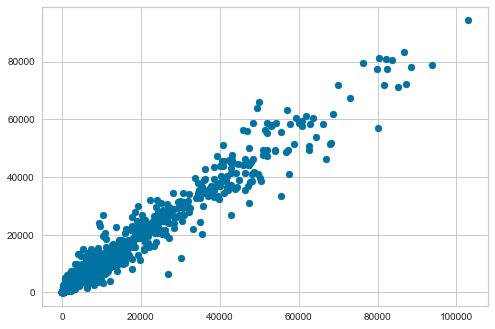

In [355]:
plt.scatter(y_test, pred)

In [368]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [369]:
pred = lm.predict(X_test)

In [373]:
eval_metrics(y_test,pred)

r2_score: 0.3426474999646393 
 mae: 6058.418014772534 
 mse: 105155195.57812698 
 rmse: 10254.520738587786


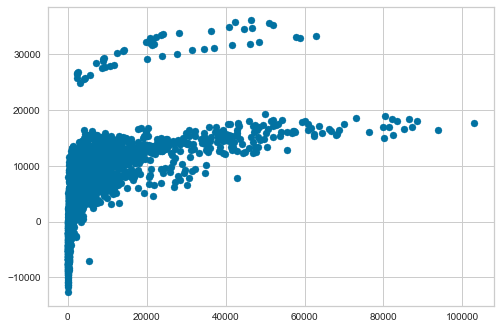

In [371]:
plt.scatter(y_test, pred)

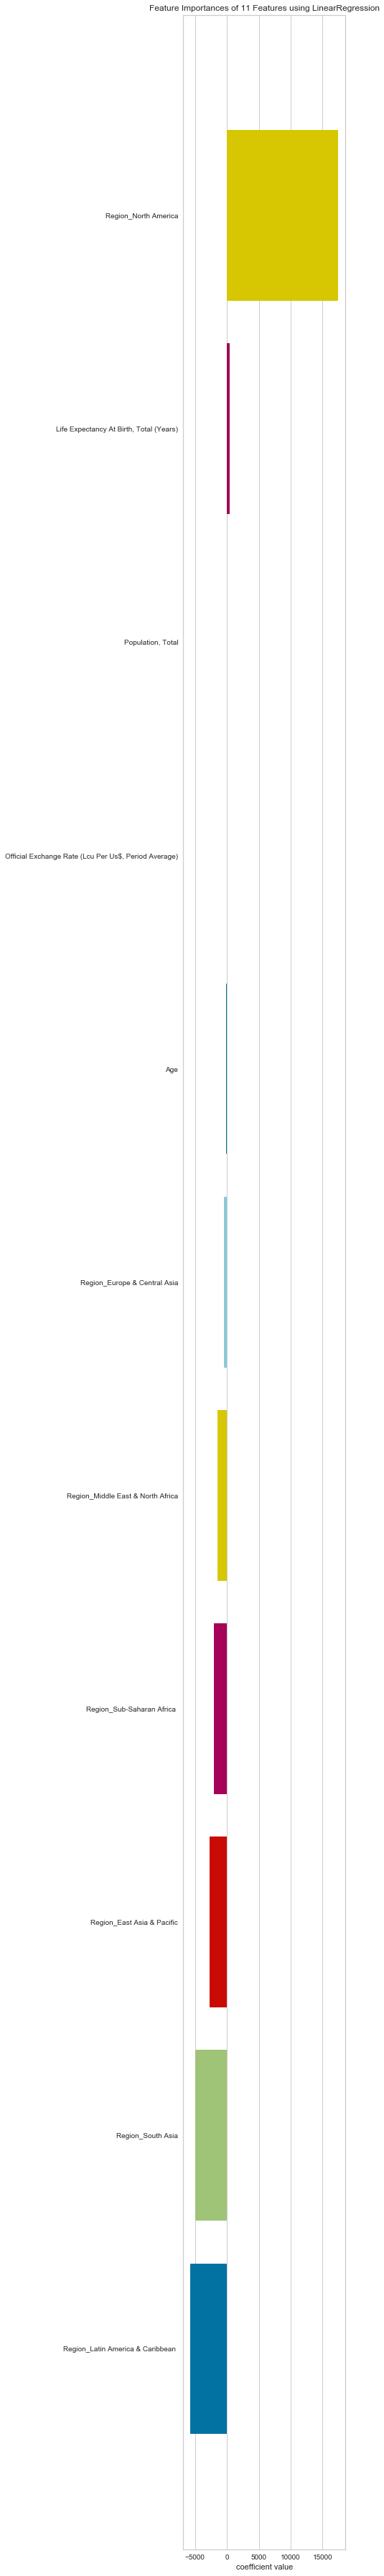

In [372]:
#feature importances for Linear Regression
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lm, labels=labels, relative=False)
visualizer = RadViz(size=(500, 3600))

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

In [13]:
adf.drop('region', axis=1, inplace=True)

In [143]:
#making pivot table to find similarity between countries for given variable
rcm_mat = adf.pivot_table(index='year', columns= 'country', values='Life expectancy at birth, total (years)')

In [144]:
cout = pd.DataFrame(adf.groupby('country')['Life expectancy at birth, total (years)'].count())

In [145]:
cout.head()

,"Life expectancy at birth, total (years)"
country,
Afghanistan,59
Albania,59
Algeria,59
American Samoa,0
Andorra,0


In [153]:
cout.rename(columns={'Life expectancy at birth, total (years)':'count'}, inplace=True)

In [147]:
rcm_mat_tr = rcm_mat['Turkey']
rcm_mat_kr = rcm_mat['Korea, Rep.']

In [148]:
#similarty for korea and turkey for Life expectancy 
similar_to_tr = rcm_mat.corrwith(rcm_mat_tr)
similar_to_kr = rcm_mat.corrwith(rcm_mat_kr)

In [149]:
similar_to_tr

country
Afghanistan              0.997651
Albania                  0.990890
Algeria                  0.990172
Angola                   0.913540
Antigua and Barbuda      0.998772
                           ...   
Virgin Islands (U.S.)    0.997176
West Bank and Gaza       0.995801
Yemen, Rep.              0.983450
Zambia                   0.362540
Zimbabwe                -0.343759
Length: 208, dtype: float64

In [150]:
corr_tr = pd.DataFrame(similar_to_tr,columns=['Correlation'])
corr_tr.dropna(inplace=True)
corr_tr.head()

,Correlation
country,
Afghanistan,0.997651
Albania,0.990890
Algeria,0.990172
Angola,0.913540
Antigua and Barbuda,0.998772


In [151]:
#the most similar countries for Turkey regarding to Life expectancy 
corr_tr.sort_values('Correlation',ascending=False).head(10)

,Correlation
country,
Isle of Man,1.000000
Turkey,1.000000
Guatemala,0.999287
Brazil,0.999252
India,0.999068
"Korea, Rep.",0.999011
Kiribati,0.998980
French Polynesia,0.998958
Samoa,0.998915


In [154]:
corr_tr = corr_tr.join(cout['count'])


In [155]:
#the most similar countries which have more than 40 values for Turkey regarding to Life expectancy 
corr_tr[corr_tr['count']>40].sort_values('Correlation',ascending=False).head(50)

,Correlation,count
country,,
Turkey,1.000000,59
Guatemala,0.999287,59
Brazil,0.999252,59
India,0.999068,59
"Korea, Rep.",0.999011,59
Kiribati,0.998980,59
French Polynesia,0.998958,59
Samoa,0.998915,59
"Hong Kong SAR, China",0.998863,59


In [22]:
#the most similar countries for Korea regarding to Life expectancy 
corr_kr = pd.DataFrame(similar_to_kr,columns=['Correlation'])
corr_kr.dropna(inplace=True)
corr_kr.head()

,Correlation
country,
Afghanistan,0.742026
Albania,0.579211
Algeria,0.819633
Angola,0.540837
Antigua and Barbuda,0.818724


In [23]:
corr_kr.sort_values('Correlation',ascending=False).head(10)

,Correlation
country,
"Korea, Rep.",1.000000
Cambodia,0.949674
Cabo Verde,0.929585
Philippines,0.919606
Fiji,0.918694
Mauritius,0.915691
Samoa,0.915533
Chile,0.907044
Trinidad and Tobago,0.904588


In [45]:
corr_kr = corr_kr.join(cout['count'])

In [46]:
#the most similar countries which have more than 40 values for Turkey regarding to Life expectancy 
corr_kr[corr_kr['count']>40].sort_values('Correlation',ascending=False).head(50)

,Correlation,count
country,,
"Korea, Rep.",1.000000,60
Cambodia,0.949674,44
Cabo Verde,0.929585,60
Philippines,0.919606,60
Fiji,0.918694,60
Mauritius,0.915691,60
Samoa,0.915533,60
Chile,0.907044,60
Trinidad and Tobago,0.904588,60


In [108]:
#fonksiyon for showing similarity for given variable and country
def recom(df, ref, cnt, limit=0, showed=5):
    rcm_mat = df.pivot_table(index='year', columns= 'country', values=ref)
    cout = pd.DataFrame(df.groupby('country')[ref].count())
    cout.rename(columns={ref:'count'}, inplace=True)
    country = rcm_mat[cnt]
    similar_country = rcm_mat.corrwith(country)
    similar_country = pd.DataFrame(similar_country,columns=['Correlation'])
    similar_country.dropna(inplace=True)
    similar_country = similar_country.join(cout['count'])
    similar_country = similar_country.drop(cnt)
    if limit>0:
        a = similar_country[similar_country['count']>limit].sort_values('Correlation',ascending=False).head(showed)
        return a[['Correlation']]
    else:
        a =  similar_country.sort_values('Correlation',ascending=False).head(showed)
        return a[['Correlation']]

In [57]:
df[df['country']=='United States'][['Official exchange rate (LCU per US$, period average)', 'year']].head(61)

,"Official exchange rate (LCU per US$, period average)",year
12566,NaN,2020
12567,1.0,2019
12568,1.0,2018
12569,1.0,2017
12570,1.0,2016
...,...,...
12622,1.0,1964
12623,1.0,1963
12624,1.0,1962
12625,1.0,1961


In [84]:
adf.columns

Index(['GDP per capita (current US$)', 'Population, total',
       'Life expectancy at birth, total (years)',
       'Official exchange rate (LCU per US$, period average)', 'year',
       'Trade (% of GDP)',
       'Foreign direct investment, net inflows (BoP, current US$)', 'country'],
      dtype='object')

In [198]:
liste = ['GDP per capita (current US$)', 'Population, total',
       'Life expectancy at birth, total (years)',
       'Official exchange rate (LCU per US$, period average)',
         'Trade (% of GDP)',
       'Foreign direct investment, net inflows (BoP, current US$)']

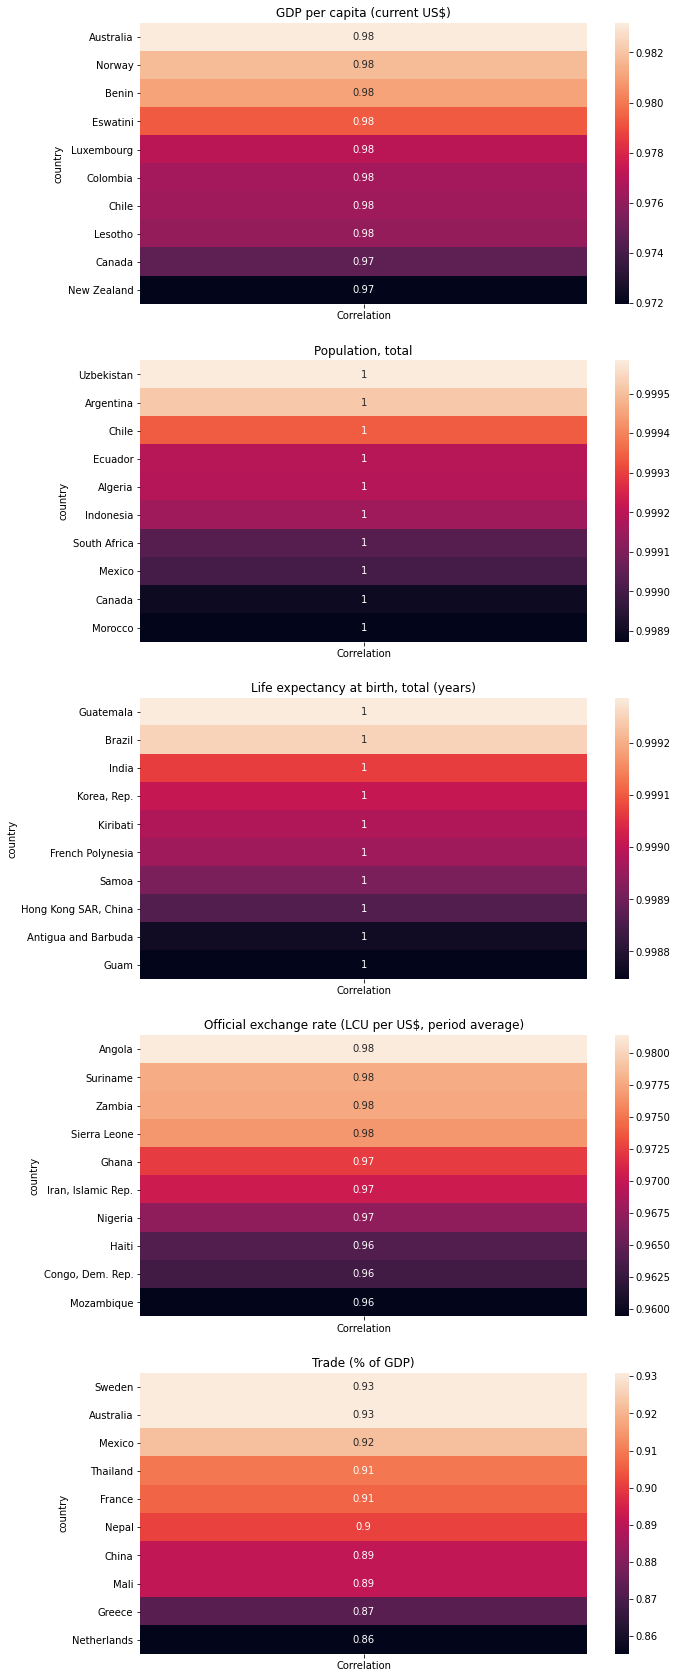

In [199]:
#showing similarity for given variables and Turkey
fig, axs = plt.subplots(5,1,figsize=(10,30))
a = 0
for i in liste:
    sns.heatmap(recom(df=adf,ref=i,cnt='Turkey', limit=50, showed=10), annot=True, ax=axs[a])
    axs[a].set_title(i)
    a += 1 
    if a==5:
        break
plt.savefig('tr_sim_rec')

In [184]:
df.columns

Index(['countryiso3code', 'country.value', 'GDP per capita (current US$)',
       'GDP (current US$)', 'Population, total',
       'Population growth (annual %)', 'School enrollment, tertiary (% gross)',
       'Life expectancy at birth, total (years)',
       'High-technology exports (% of manufactured exports)',
       'Research and development expenditure (% of GDP)',
       'International tourism, number of arrivals',
       'International tourism, number of departures',
       'Refugee population by country or territory of origin',
       'Refugee population by country or territory of asylum',
       'Inflation, consumer prices (annual %)',
       'Official exchange rate (LCU per US$, period average)',
       'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
       'Gini index (World Bank estimate)',
       'CO2 emissions (kg per PPP $ of GDP)',
       'Energy use (kg of oil equivalent per capita)', 'Trade (% of GDP)',
       'Foreign direct investment, net in

<AxesSubplot:ylabel='country'>

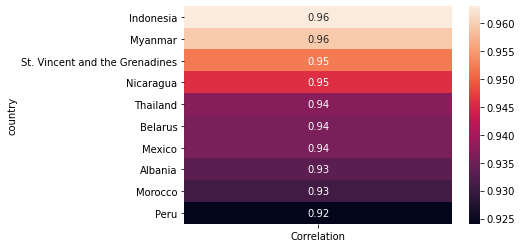

In [185]:
#showing similarity for given variable and Turkey
sns.heatmap(recom(df=df,ref='Population growth (annual %)',cnt='Turkey', limit=50, showed=10), annot=True)

In [213]:
liste = ['Population growth (annual %)', 'School enrollment, tertiary (% gross)',
       'Life expectancy at birth, total (years)',

       'Research and development expenditure (% of GDP)',
       'International tourism, number of arrivals',
       'International tourism, number of departures',
       'Refugee population by country or territory of origin',
       'Refugee population by country or territory of asylum',
       'Inflation, consumer prices (annual %)']

In [209]:
liste = ['Population growth (annual %)',
       'Research and development expenditure (% of GDP)',
         'Official exchange rate (LCU per US$, period average)',
         'Trade (% of GDP)',
       'Inflation, consumer prices (annual %)']

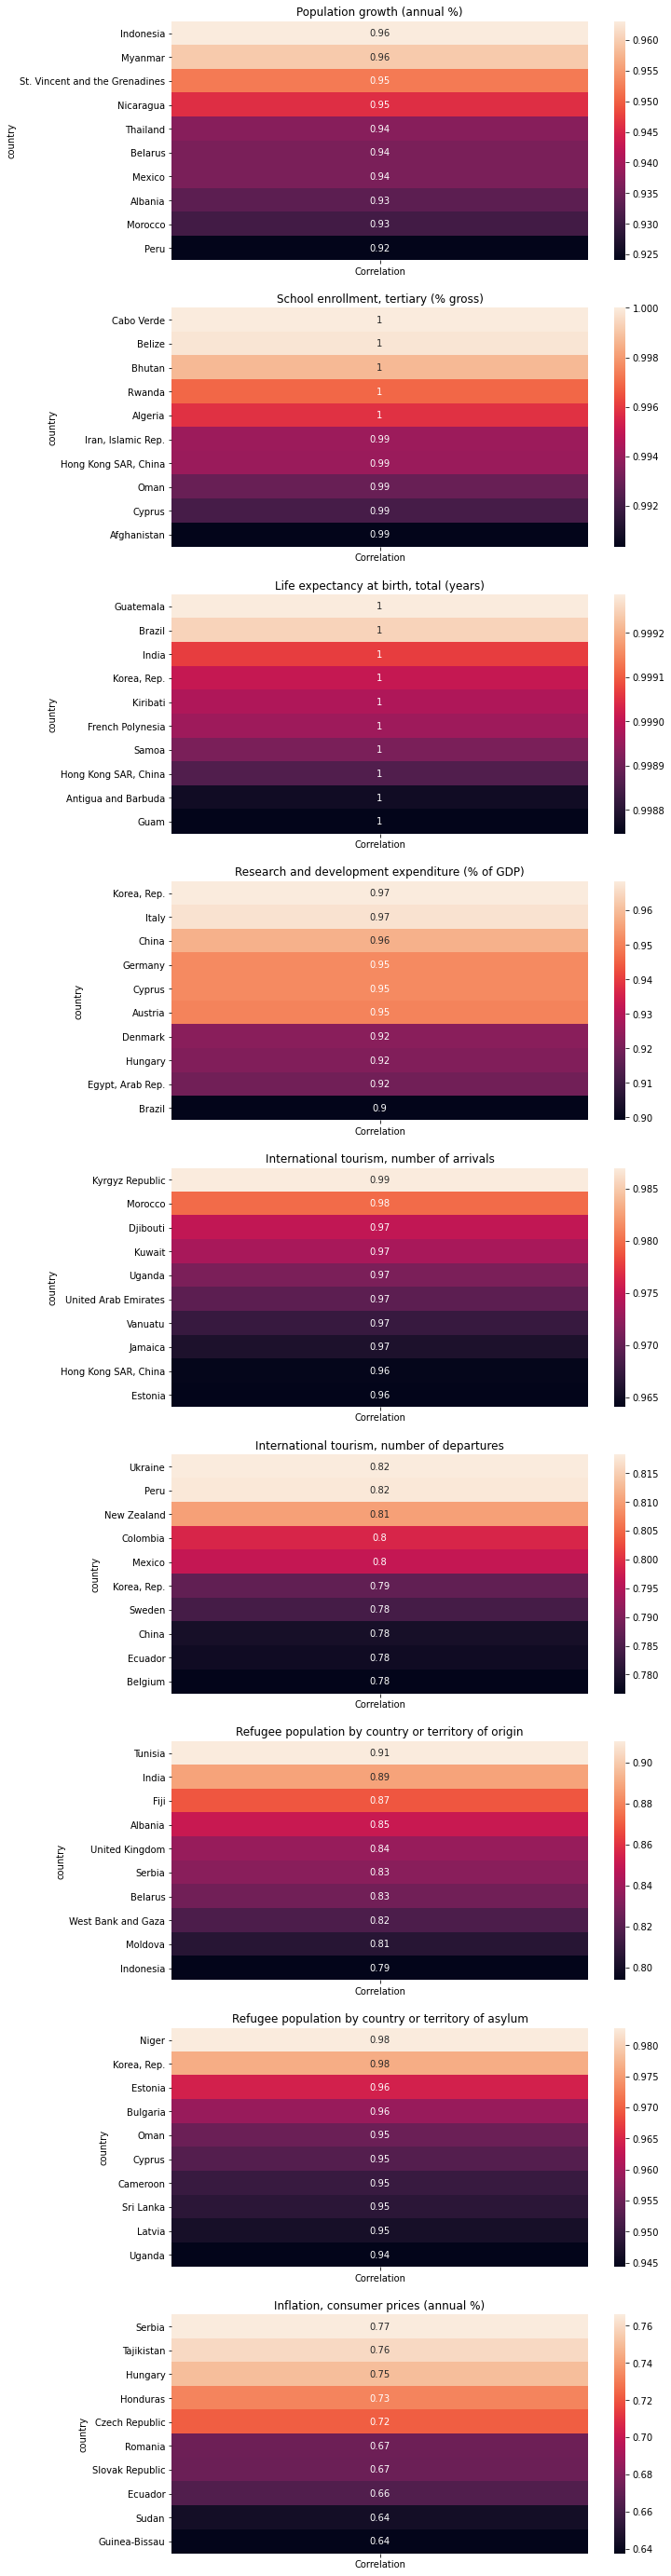

In [214]:
#showing similarity for given variables and Turkey
fig, axs = plt.subplots(len(liste),1,figsize=(10,50))
a = 0
for i in liste:
    sns.heatmap(recom(df=df,ref=i,cnt='Turkey', limit=15, showed=10), annot=True, ax=axs[a])
    axs[a].set_title(i)
    a += 1 
    if a==len(liste):
        break
plt.savefig('tr_sim_rec1')

In [221]:
liste = ['Population growth (annual %)',
         'Official exchange rate (LCU per US$, period average)',
         'Trade (% of GDP)',
       'Inflation, consumer prices (annual %)']

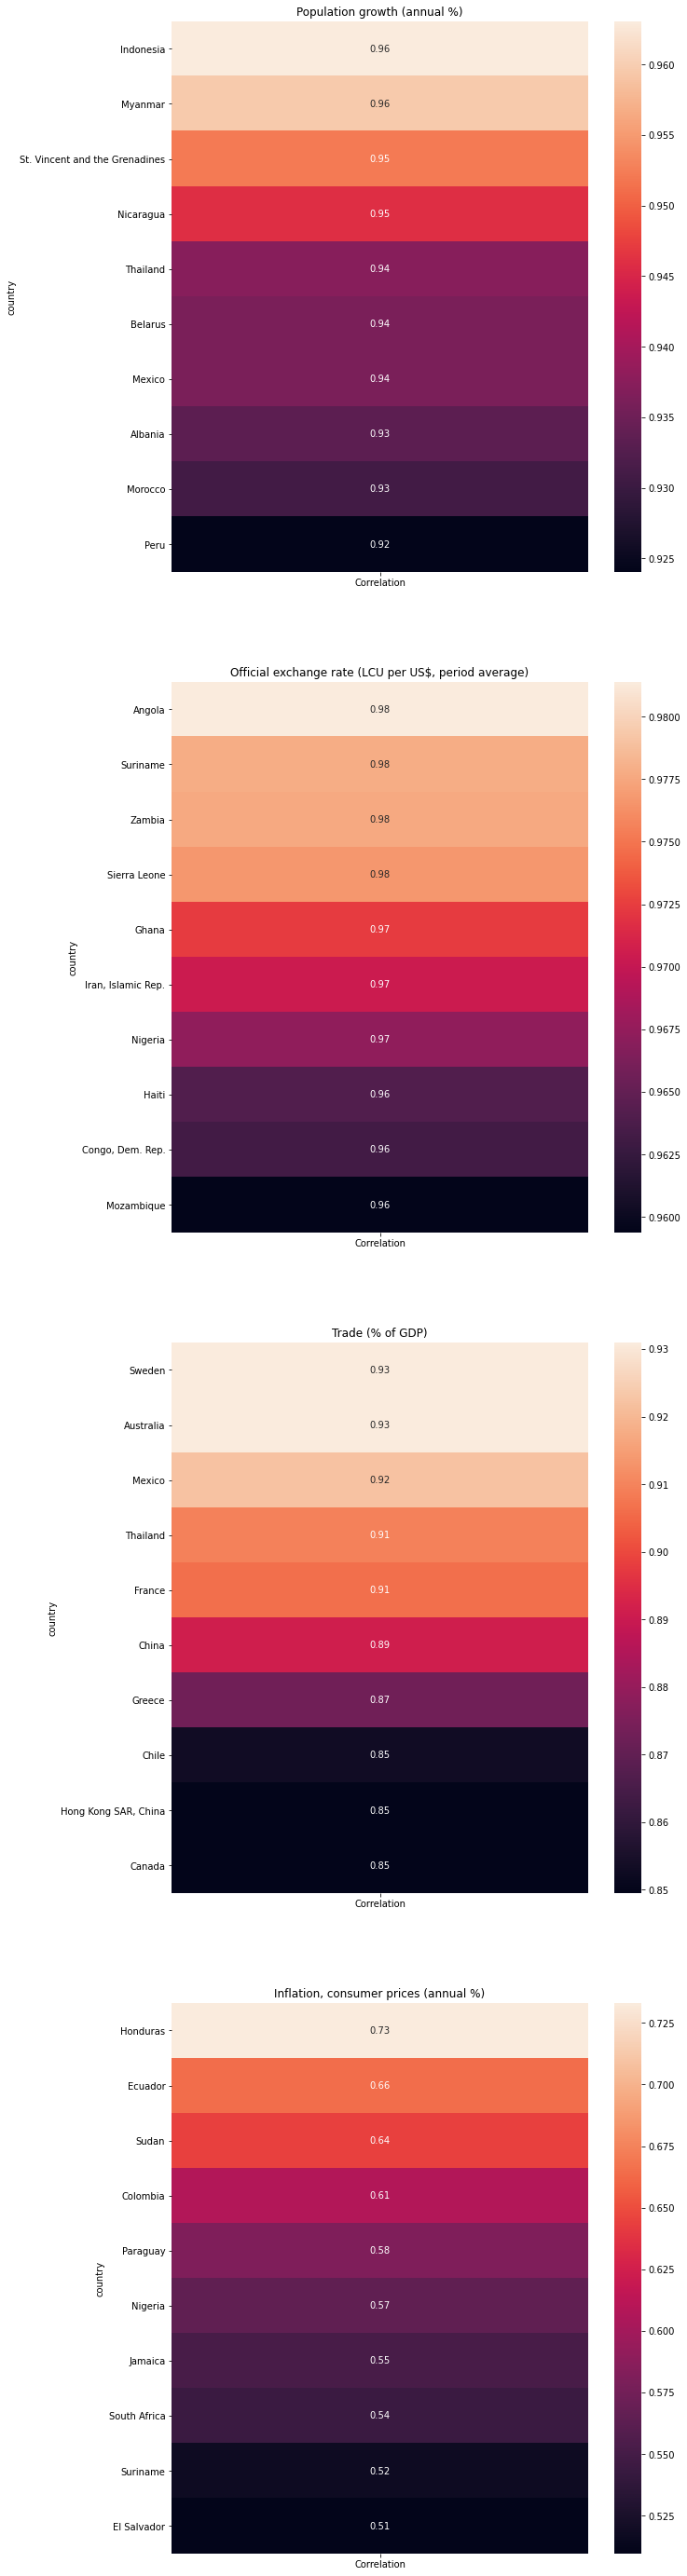

In [226]:
#showing similarity for given variables and Turkey
fig, axs = plt.subplots(len(liste),1,figsize=(10,50))
a = 0
for i in liste:
    sns.heatmap(recom(df=df,ref=i,cnt='Turkey', limit=55, showed=10), annot=True, ax=axs[a])
    axs[a].set_title(i)
    a += 1 
    if a==len(liste):
        break
plt.savefig('tr_comparing')